# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/d8ec60a9509245ea9dd4073c9fc5ce2d22d38ae8cfe148550e6c959e.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Paradise Valley, Arizona, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'d8ec60a9509245ea9dd4073c9fc5ce2d22d38ae8cfe148550e6c959e')

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/d8ec60a9509245ea9dd4073c9fc5ce2d22d38ae8cfe148550e6c959e.csv')
df['2015']=df['Date'].apply(lambda x:True if '2015' in x else False)
df_2015=df[df['2015']==True]  # grab 2015 data
df=df[(df['Date']!='2008-02-29') &  (df['Date']!='2012-02-29') & (df['2015']==False)] # filter out 2015 data and 2/29 data
df['Date']=df['Date'].apply(lambda x:x[5:]) # remove the year from the date
df['Date']=pd.to_datetime(df['Date'],format='%m-%d')  # convert the date string to datetime type
df_low=df[df['Element']=='TMIN']  # grab the min T data
df_high=df[df['Element']=='TMAX'] # grab the max T data
df_low=df_low.groupby('Date').min()['Data_Value']  # aggregation/group by to get min of record low
df_high=df_high.groupby('Date').max()['Data_Value'] # aggregation/group by to get max of record high


# process the data in 2015
df_2015['Date']=df_2015['Date'].apply(lambda x:x[5:])
df_2015['Date']=pd.to_datetime(df_2015['Date'],format='%m-%d')
df_2015_low=df_2015[df_2015['Element']=='TMIN']
df_2015_high=df_2015[df_2015['Element']=='TMAX']


In [4]:

# grab the rows with low T lower than record low between 2005 -2014
df_low_n=pd.DataFrame(df_low)
df_2015_low=df_2015_low.merge(df_low_n,how='left',left_on='Date',right_index=True)
df_2015_low['compare']=df_2015_low['Data_Value_x']-df_2015_low['Data_Value_y']
df_2015_low=df_2015_low[df_2015_low['compare']<0]

# grab the rows with low T lower than record low between 2005 -2014
df_high_n=pd.DataFrame(df_high)
df_2015_high=df_2015_high.merge(df_high_n,how='left',left_on='Date',right_index=True)
df_2015_high['compare']=df_2015_high['Data_Value_x']-df_2015_high['Data_Value_y']
df_2015_high=df_2015_high[df_2015_high['compare']>0]

df_2015_broken_low=np.array(df_2015_low['Data_Value_x'])
df_2015_broken_low_date=df_2015_low['Date'].values

df_2015_broken_high=np.array(df_2015_high['Data_Value_x'])
df_2015_broken_high_date=df_2015_high['Date'].values

In [5]:
%matplotlib notebook
import matplotlib.dates as mdates

<IPython.core.display.Javascript object>


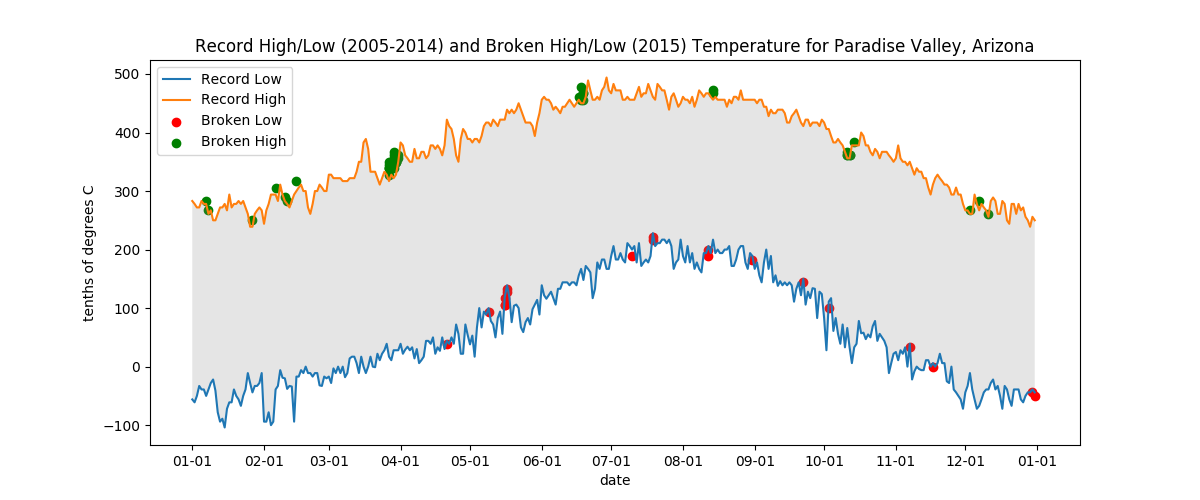

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df_low.index.values,df_low.values,df_high.index.values, df_high.values)
plt.scatter(df_2015_broken_low_date,df_2015_broken_low,c='red',label='Broken Low')
plt.scatter(df_2015_broken_high_date,df_2015_broken_high,c='green',label='Broken High')

plt.title('Record High/Low (2005-2014) and Broken High/Low (2015) Temperature for Paradise Valley, Arizona')
plt.legend(['Record Low','Record High','Broken Low','Broken High'],loc=2)
plt.xlabel('date')
plt.ylabel('tenths of degrees C')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # strip the year from the date x label
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # interval for x label is 1 month
plt.gca().fill_between(df_low.index.values,df_low.values,df_high.values,facecolor='grey',alpha=0.2)  # add shade between two lines
